In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from itertools import cycle, islice

In [2]:
plt.rcParams['figure.figsize'] = 12,8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Кластеры в форме кругов с различной дисперсией
random_state = 170
X, y = datasets.make_blobs(n_samples = n_samples, random_state=random_state, cluster_std=[1.0, 2.5, 0.5])
varied = X

# Кластеры лентовидной формы
random_state=170
X, y = datasets.make_blobs(n_samples = n_samples, random_state=random_state)
transformation = [[0.6, -0.6],[-0.4, 0.8]]
aniso = np.dot(X,transformation)

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
# Оставляем только признаки датасета, т.к. для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X, y = noisy_moons
noisy_moons = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

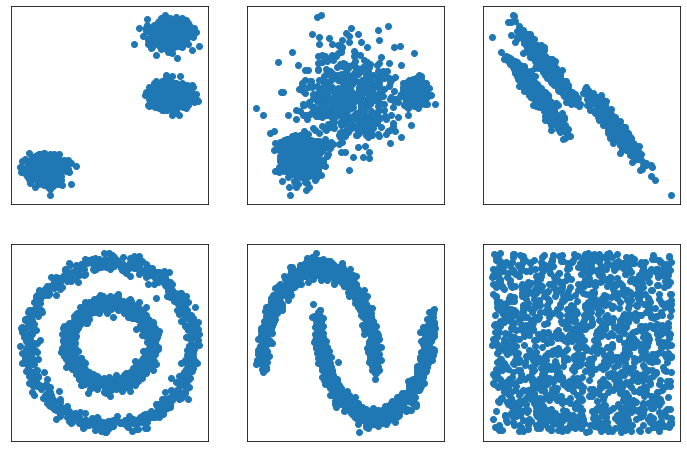

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:,0], X[:,1])


# KMeans

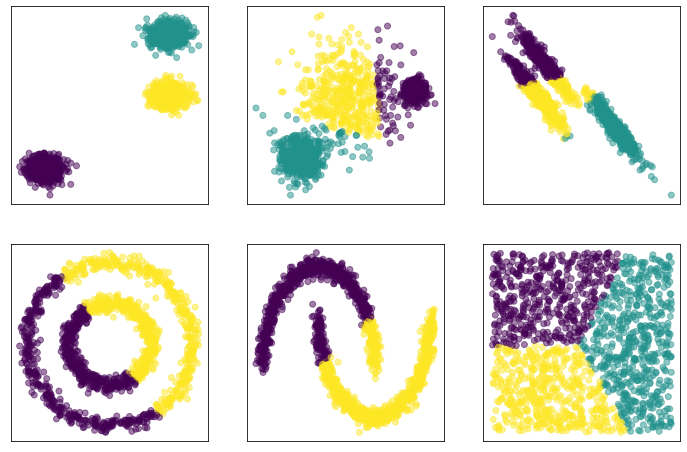

In [5]:
from sklearn.cluster import KMeans

datasets_params_list = [(blobs, {'n_clusters': 3}),
                        (varied, {'n_clusters': 3}),
                        (aniso, {'n_clusters': 3}),
                        (noisy_circles, {'n_clusters': 2}),
                        (noisy_moons, {'n_clusters': 2}),
                        (no_structure, {'n_clusters': 3})]

colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

for i, (X, params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    y_pred = KMeans(n_clusters = params['n_clusters']).fit(X).predict(X)
    
    #X = np.column_stack((X,y_pred))
        
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    #for c in set(y_pred):
    #    X_tmp = X[np.where(y_pred==c)]
    #    plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])
    plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=.5)

In [6]:
# Учебная задача №1
# Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

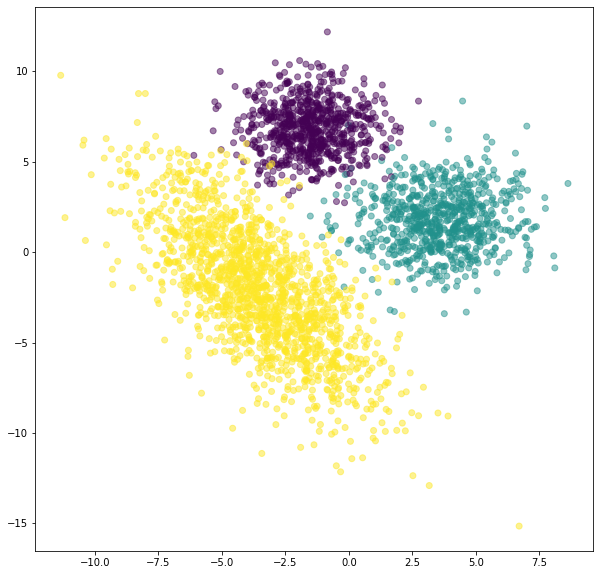

In [7]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

In [8]:
# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [9]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

print(np.round(k_means.cluster_centers_).astype(int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [10]:
clusters, counts = np.unique(k_means.labels_, return_counts=True)
dict(zip(clusters, counts))

{0: 1320, 1: 938, 2: 742}

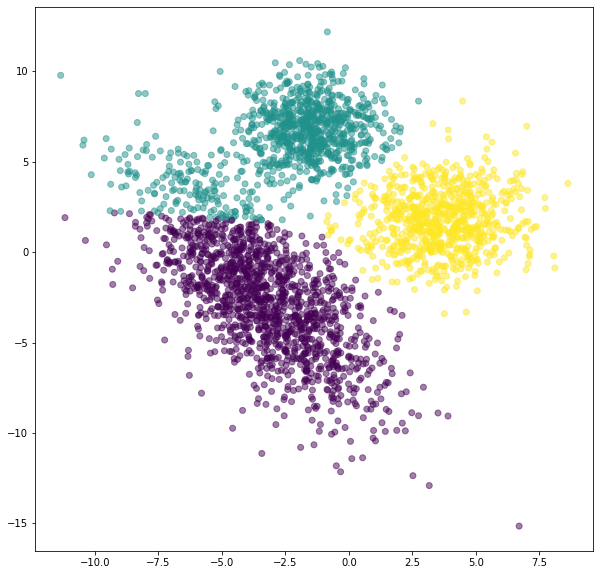

In [11]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=k_means.labels_, alpha=.5)
plt.show()

В датасете для учеников предоставлены следующие признаки:  

* Год выпуска  
* Пол  
* Возраст  
* Количество друзей  

36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)
Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.  

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.  

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [12]:
data = pd.read_csv('snsdata.csv')
data.tail()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,2009,F,18.724,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [14]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

<AxesSubplot:>

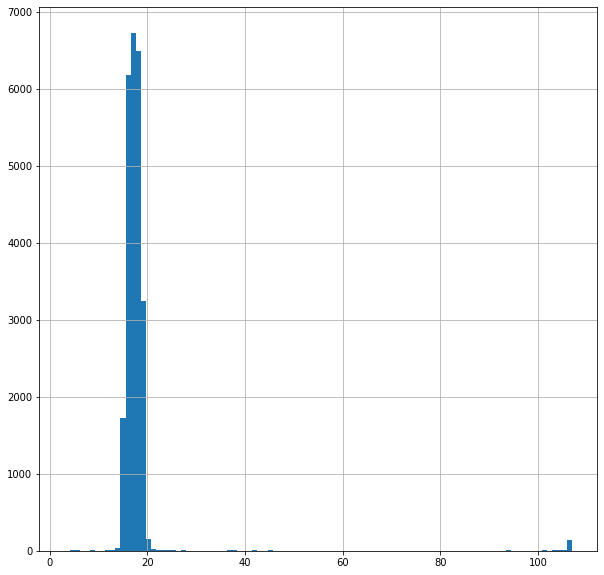

In [15]:
data.age.hist(bins=100)

In [16]:
X = np.array(data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1))
X = StandardScaler().fit_transform(X)
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X)

KMeans(n_clusters=9, random_state=123)

In [17]:
clusters, counts = np.unique(k_means.labels_, return_counts=True)
dict(zip(clusters, counts))

{0: 5036, 1: 1337, 2: 752, 3: 697, 4: 20024, 5: 1, 6: 846, 7: 466, 8: 841}

In [18]:
data['cluster'] = k_means.labels_

In [19]:
data[data.drunk>5]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
1213,2006,M,18.626,37,0,1,0,0,0,0,...,0,0,0,0,0,0,0,7,0,1
2265,2006,NaN,NaN,55,1,0,0,0,0,0,...,1,0,0,0,0,3,1,6,0,1
2973,2006,F,18.264,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,7,0,1
5216,2006,M,18.861,46,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,0,1
5451,2006,NaN,NaN,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,6,0,1
6516,2006,M,18.374,64,0,0,0,0,0,0,...,0,0,1,0,1,2,1,8,4,1
8003,2007,F,17.572,28,1,2,0,1,0,0,...,3,0,1,0,0,1,0,7,1,6
12223,2007,F,17.432,15,0,0,0,0,0,0,...,2,0,0,0,0,2,0,7,0,1
12453,2007,F,17.284,45,0,1,0,0,0,0,...,0,0,1,0,0,0,0,8,0,1
12929,2007,F,17.133,129,0,2,0,0,1,0,...,0,1,0,0,0,1,1,8,0,1


In [20]:
df = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
clusters = []
top_words = []
for k,group in df.groupby(data.cluster):
    clusters.append(k)
    top_words.append(list(group.drop('cluster', axis=1).sum().sort_values(ascending=False).index[:10]))
my_dict = dict(zip(clusters,top_words))
for key in my_dict.keys():
    my_dict[key].sort()
my_dict

{0: ['basketball',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'mall',
  'music',
  'shopping'],
 1: ['cute',
  'dance',
  'die',
  'drunk',
  'god',
  'hair',
  'mall',
  'music',
  'sex',
  'shopping'],
 2: ['band',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'marching',
  'music',
  'rock',
  'shopping'],
 3: ['basketball',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'music',
  'shopping',
  'soccer'],
 4: ['band',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'music',
  'rock',
  'shopping'],
 5: ['blonde',
  'death',
  'die',
  'dress',
  'drunk',
  'football',
  'god',
  'hair',
  'rock',
  'sex'],
 6: ['clothes',
  'dance',
  'die',
  'drugs',
  'god',
  'hair',
  'kissed',
  'music',
  'rock',
  'sex'],
 7: ['band',
  'bible',
  'church',
  'dance',
  'die',
  'god',
  'hair',
  'jesus',
  'music',
  'shopping'],
 8: ['abercrombie',
  'clothes',
  'cute',
  'dance',
  'god',
  'hair',
  'hollister

In [21]:
ask = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']
ask.sort()
ask

['band',
 'church',
 'cute',
 'dance',
 'football',
 'god',
 'hair',
 'music',
 'rock',
 'shopping']

In [22]:
for k,v in my_dict.items():
    if v == ask:
        print(k)

4


In [23]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [24]:
data.groupby('cluster').count()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,5036,4735,4319,5036,5036,5036,5036,5036,5036,5036,...,5036,5036,5036,5036,5036,5036,5036,5036,5036,5036
1,1337,1242,1159,1337,1337,1337,1337,1337,1337,1337,...,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337
2,752,706,651,752,752,752,752,752,752,752,...,752,752,752,752,752,752,752,752,752,752
3,697,646,589,697,697,697,697,697,697,697,...,697,697,697,697,697,697,697,697,697,697
4,20024,17937,16369,20024,20024,20024,20024,20024,20024,20024,...,20024,20024,20024,20024,20024,20024,20024,20024,20024,20024
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,846,798,727,846,846,846,846,846,846,846,...,846,846,846,846,846,846,846,846,846,846
7,466,434,386,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,466
8,841,777,713,841,841,841,841,841,841,841,...,841,841,841,841,841,841,841,841,841,841


# EM-алгоритм

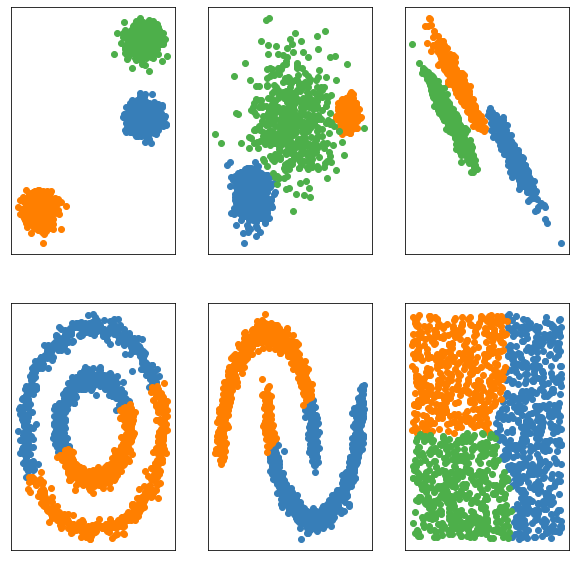

In [25]:
from sklearn.mixture import GaussianMixture

datasets_params_list = [(blobs, {'n_clusters': 3}),
                        (varied, {'n_clusters': 3}),
                        (aniso, {'n_clusters': 3}),
                        (noisy_circles, {'n_clusters': 2}),
                        (noisy_moons, {'n_clusters': 2}),
                        (no_structure, {'n_clusters': 3})]

colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

for i, (X, params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    y_pred = GaussianMixture(n_components = params['n_clusters']).fit(X).predict(X)
    #y_pred = GaussianMixture(n_components = 5).fit(X).predict(X)
        
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    for c in set(y_pred):
        X_tmp = X[np.where(y_pred==c)]
        plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])

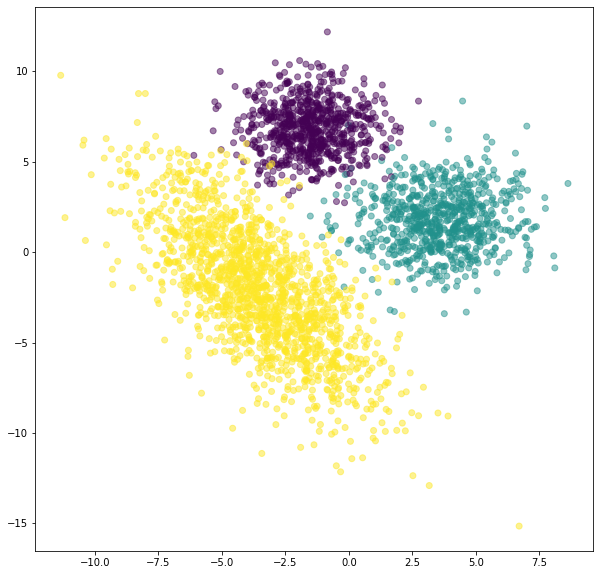

In [26]:
# Учебная задача №1
# Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

In [27]:
# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Initialization 0
  Iteration 1	 time lapse 0.04288s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.02045
  Iteration 3	 time lapse 0.00199s	 ll change 0.02017
  Iteration 4	 time lapse 0.00100s	 ll change 0.01705
  Iteration 5	 time lapse 0.00199s	 ll change 0.00902
  Iteration 6	 time lapse 0.00199s	 ll change 0.00254
  Iteration 7	 time lapse 0.00100s	 ll change 0.00047
Initialization converged: True	 time lapse 0.05186s	 ll -5.15569


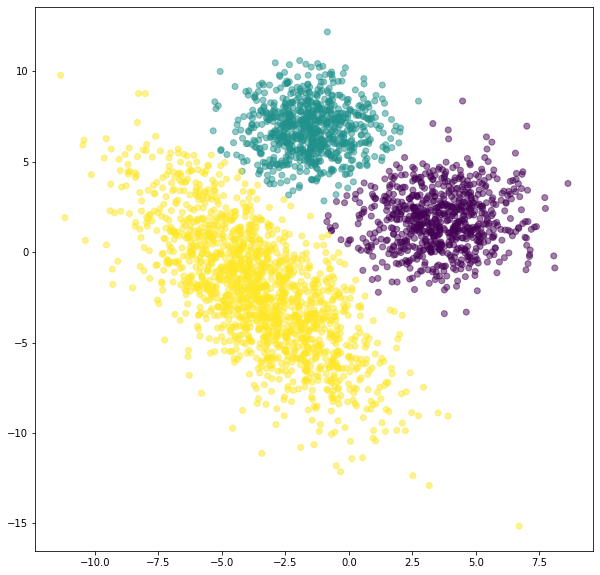

In [28]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=3, verbose=2, verbose_interval=1, random_state=42)
y_pred = em_gm.fit_predict(X)

#y_pred

plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=.5)
plt.show()

In [29]:
np.round(em_gm.means_,0).astype(int)

array([[ 4,  2],
       [-2,  7],
       [-4, -2]])

In [30]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))
for count in counts:
    print(count, end=' ')

744 763 1493 

Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним EM-алгоритм , количество кластеров — 9, random_state = 123. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [31]:
data = pd.read_csv('snsdata.csv')
data.tail()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,2009,F,18.724,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [35]:
X = np.array(data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1))
X = StandardScaler().fit_transform(X)

em = GaussianMixture(n_components=9, random_state=123, verbose=2, verbose_interval=1)
data['cluster'] = em.fit_predict(X)

data['cluster'].iloc[7]

Initialization 0
  Iteration 1	 time lapse 0.55044s	 ll change inf
  Iteration 2	 time lapse 0.32599s	 ll change 16.79586
  Iteration 3	 time lapse 0.41813s	 ll change 7.60199
  Iteration 4	 time lapse 0.32857s	 ll change 7.41134
  Iteration 5	 time lapse 0.35235s	 ll change 8.40622
  Iteration 6	 time lapse 0.36702s	 ll change 6.88179
  Iteration 7	 time lapse 0.33819s	 ll change 0.64672
  Iteration 8	 time lapse 0.35994s	 ll change 0.12303
  Iteration 9	 time lapse 0.36355s	 ll change 0.17039
  Iteration 10	 time lapse 0.34063s	 ll change 0.66474
  Iteration 11	 time lapse 0.33175s	 ll change 0.27730
  Iteration 12	 time lapse 0.35660s	 ll change 0.03235
  Iteration 13	 time lapse 0.32202s	 ll change 0.03005
  Iteration 14	 time lapse 0.32052s	 ll change 0.01911
  Iteration 15	 time lapse 0.33722s	 ll change 0.01434
  Iteration 16	 time lapse 0.32032s	 ll change 0.01851
  Iteration 17	 time lapse 0.30810s	 ll change 0.15707
  Iteration 18	 time lapse 0.31871s	 ll change 0.01365
  Ite

5

# Agglomerative Clustering

В алгоритме мы сначала нормализуем признаки объектов, а затем строим матрицу смежности. Так мы получаем расстояние между объектами датасета. Далее создаём объект агломеративной кластеризации и передаём в него матрицу. Обучаем алгоритм, игнорируем предупреждения и строим предсказания.

In [90]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

X = [[2,2],
     [5,2],
     [8,2],
     [8,6],
     [5,6],
     [2,6]]

X = StandardScaler().fit_transform(X)

# строим матрицу смежности
connectivity = kneighbors_graph(X,
                              n_neighbors=3,
                              mode='distance',
                              include_self=False)
connectivity.toarray()

#knn_graph = kneighbors_graph(X, 3, include_self=False)
#for connectivity in (None, knn_graph):
#    print(connectivity)


array([[0.        , 1.22474487, 0.        , 0.        , 2.34520788,
        2.        ],
       [1.22474487, 0.        , 1.22474487, 0.        , 2.        ,
        0.        ],
       [0.        , 1.22474487, 0.        , 2.        , 2.34520788,
        0.        ],
       [0.        , 2.34520788, 2.        , 0.        , 1.22474487,
        0.        ],
       [0.        , 2.        , 0.        , 1.22474487, 0.        ,
        1.22474487],
       [2.        , 2.34520788, 0.        , 0.        , 1.22474487,
        0.        ]])

In [67]:
# в матрице смежности от kneighbors_graph строки - это исходящие ребра к n_neighbors ближайшим соседям
# а столбцы - это входящие ребра от n_neighbors ближайших соседей.
# сделаем матрицу смежности симметричной
connectivity = 0.5*(connectivity + connectivity.T)
connectivity.toarray()[:,0].sum()

2.5

In [71]:
X = blobs
# строим матрицу смежности
connectivity = kneighbors_graph(X, n_neighbors=10)
for i in range(5):
    print(f'Количество исходящих ребер вершины {i}: {connectivity.toarray()[i].sum()}')
    print(f'Количество входящих ребер вершины {i}: {connectivity.toarray()[:,i].sum()}')
# сделаем матрицу смежности симметричной
connectivity = 0.5*(connectivity + connectivity.T)
print('А в симметричной матрице:')
for i in range(5):
    print(f'Количество исходящих ребер вершины {i}: {connectivity.toarray()[i].sum()}')
    print(f'Количество входящих ребер вершины {i}: {connectivity.toarray()[:,i].sum()}')

Количество исходящих ребер вершины 0: 10.0
Количество входящих ребер вершины 0: 12.0
Количество исходящих ребер вершины 1: 10.0
Количество входящих ребер вершины 1: 14.0
Количество исходящих ребер вершины 2: 10.0
Количество входящих ребер вершины 2: 8.0
Количество исходящих ребер вершины 3: 10.0
Количество входящих ребер вершины 3: 4.0
Количество исходящих ребер вершины 4: 10.0
Количество входящих ребер вершины 4: 9.0
А в симметричной матрице:
Количество исходящих ребер вершины 0: 11.0
Количество входящих ребер вершины 0: 11.0
Количество исходящих ребер вершины 1: 12.0
Количество входящих ребер вершины 1: 12.0
Количество исходящих ребер вершины 2: 9.0
Количество входящих ребер вершины 2: 9.0
Количество исходящих ребер вершины 3: 7.0
Количество входящих ребер вершины 3: 7.0
Количество исходящих ребер вершины 4: 9.5
Количество входящих ребер вершины 4: 9.5


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:549: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:549: UserWarning: the number of connected components of the connectivity matrix is 78 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:549: UserWarning: the number of connected components of the connectivity matrix is 51 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_a

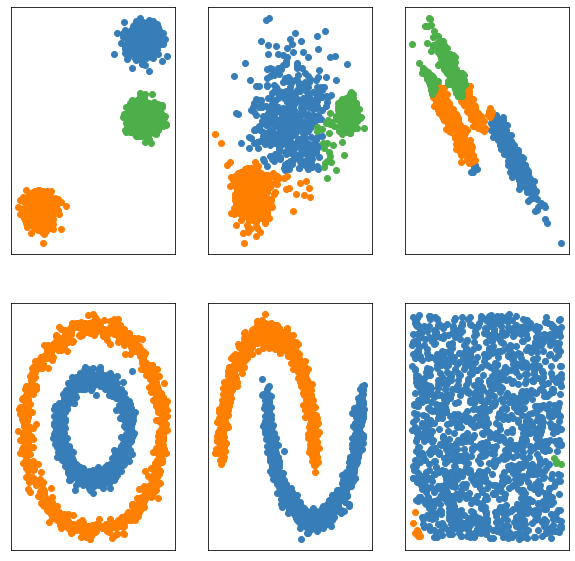

In [83]:
datasets_params_list = [(blobs, {'n_clusters': 3, 'n_neighbors': 10}),
                        (varied, {'n_clusters': 3, 'n_neighbors': 2}),
                        (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
                        (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
                        (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
                        (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X,params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5*(connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters = params['n_clusters'],
                                 linkage='average',
                                 connectivity=connectivity).fit(X)
    y_pred = ac.labels_.astype(int)
    
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    for c in set(y_pred):
        X_tmp = X[np.where(y_pred==c)]
        plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])

В результате агломеративная кластеризация справилась лучше, чем EM-алгоритм со сложными кластерами, с ленточными, наоборот, хуже. При отсутствии кластерной структуры агломеративная кластеризация более явно определяет это.

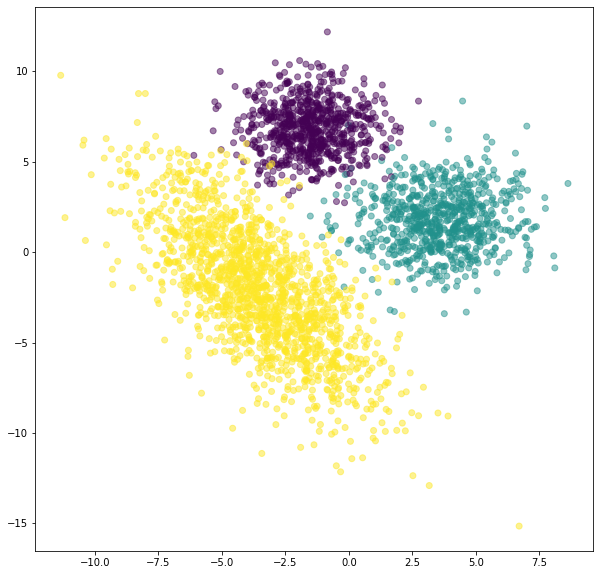

In [119]:
# Учебная задача №1
# Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

In [93]:
# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [120]:
from sklearn.cluster import AgglomerativeClustering

#X = StandardScaler().fit_transform(X)
connectivity=kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5*(connectivity + connectivity.T)
ac = AgglomerativeClustering(n_clusters = 3,
                             #linkage='average',
                             connectivity=connectivity
                            ).fit(X)
ac.n_leaves_

3000

In [121]:
unique, counts = np.unique(ac.labels_, return_counts=True)
print(dict(zip(unique,counts)))
for count in counts:
    print(count, end=' ')

{0: 1486, 1: 746, 2: 768}
1486 746 768 

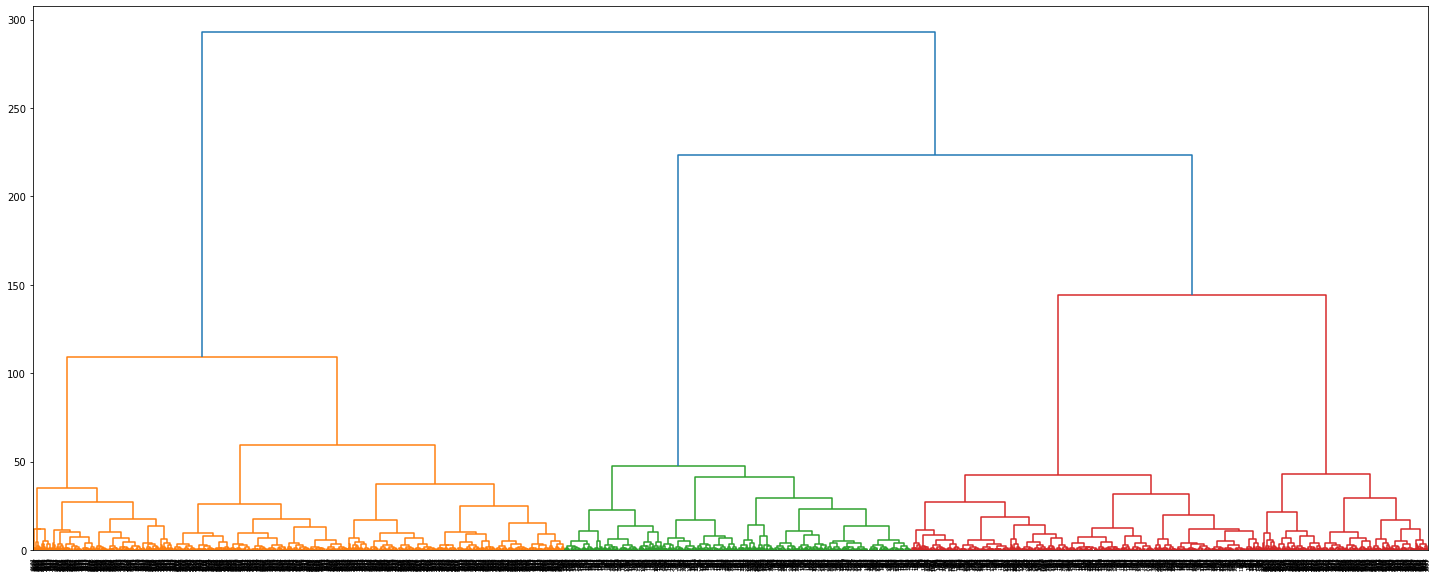

In [123]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# еще один способ выполнить агломеративную кластеризацию
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z, leaf_rotation=90)
plt.show()

In [126]:
df = pd.read_csv('food.txt', sep=' ')
df

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7
5,Broiled chicken,115,20,3,8,1.4
6,Canned chicken,170,25,7,12,1.5
7,Beef heart,160,26,5,14,5.9
8,Roast lamb leg,265,20,20,9,2.6
9,Roast lamb shoulder,300,18,25,9,2.3


In [142]:
X = np.array(df.drop('Name', axis=1))
X = StandardScaler().fit_transform(X)

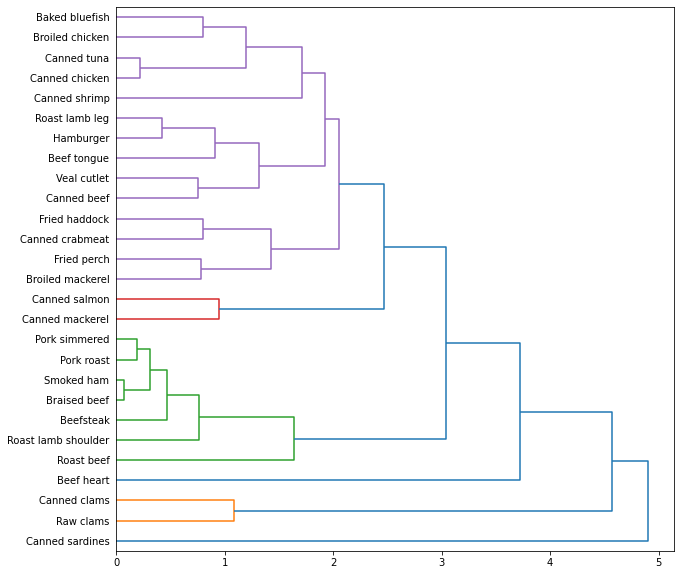

In [158]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='average', metric='euclidean')
names = df.Name.values
dend = dendrogram(Z,
                  color_threshold=2.3,
                  labels=names, 
                  orientation='right')

In [149]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')
len(labels)

27

In [152]:
# Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.
df['label'] = labels
df[df.Calcium.between(150,161)]

,Name,Energy,Protein,Fat,Calcium,Iron,label
21,Canned mackerel,155,16,9,157,1.8,3
23,Canned salmon,120,17,5,159,0.7,3


In [156]:
# Введите номер кластера, в который попал продукт с максимальной жирностью.
df[df.Fat == df.Fat.max()]

,Name,Energy,Protein,Fat,Calcium,Iron,label
2,Roast beef,420,15,39,7,2.0,2
